# Augmentations

In [1]:
import os
import torch
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import warnings 
import random
import tqdm
warnings.filterwarnings("ignore")

In [2]:
from SproutDataset import SproutDataset
from torch.utils.data import DataLoader
from Augmentation import Augmentation
from Sprout_ML import Sprout_ML, interpolate_arrays

In [3]:
aug = Augmentation(type_distrib_gain='uniform', num_hits=1, gain_range=(0.1, 3), normalize_intensity=False, log_space=True)

In [4]:
spectra = xr.open_dataset("C:\\Users\\tania\\Documents\\SPICE\\SPROUTS\\spectra_11Feb2023.nc")
item = spectra.isel(index=756)
augs = [aug.run_all_augmentations(item)[0] for _ in range(1000)]
item['flux'].values = np.abs(np.nan_to_num(np.log(item['flux'].values),nan=0, posinf=0, neginf=0))

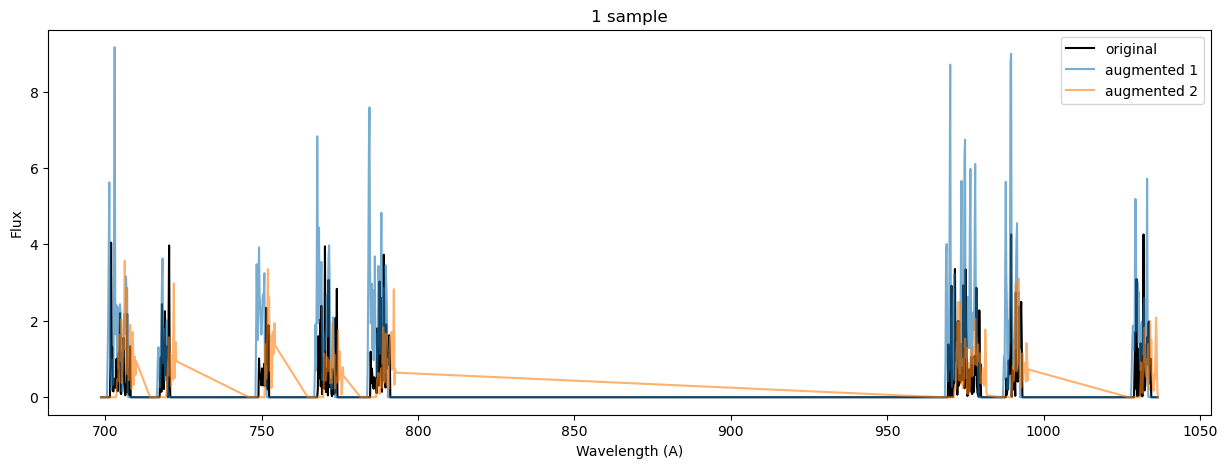

In [7]:
plt.figure(figsize=(15,5))
plt.plot(item['wvl'].values, item['flux'].values, color='black', label='original')
plt.plot(item['wvl'].values, augs[20], label='augmented 1', alpha=0.6)
plt.plot(item['wvl'].values, augs[40], label='augmented 2', alpha=0.6)

plt.ylabel('Flux')
#plt.ylim(0,8)
plt.xlabel('Wavelength (A)')
plt.title('1 sample')
plt.legend()

In [16]:
item['wvl'].values[276:350]

array([967.85, 968.04, 968.23, 968.42, 968.61, 968.8 , 968.99, 969.18,
       969.37, 969.56, 969.75, 969.94, 970.13, 970.32, 970.51, 970.7 ,
       970.89, 971.08, 971.27, 971.46, 971.65, 971.84, 972.03, 972.22,
       972.41, 972.6 , 972.79, 972.98, 973.17, 973.36, 973.55, 973.74,
       973.93, 974.12, 974.31, 974.5 , 974.69, 974.88, 975.07, 975.26,
       975.45, 975.64, 975.83, 976.02, 976.21, 976.4 , 976.59, 976.78,
       976.97, 977.16, 977.35, 977.54, 977.73, 977.92, 978.11, 978.3 ,
       978.49, 978.68, 978.87, 979.06, 979.25, 979.44, 979.63, 979.82,
       980.01, 980.2 , 980.39, 980.58, 980.77, 980.96, 981.15, 981.34,
       981.53, 981.72])

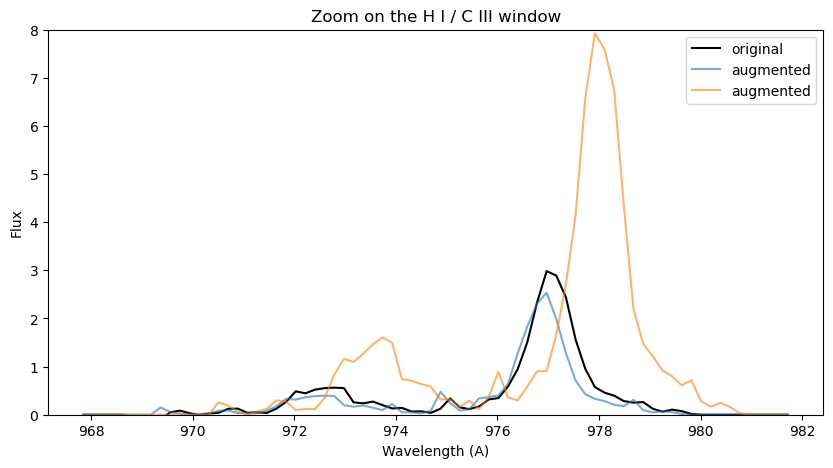

In [17]:
plt.figure(figsize=(10,5))
plt.plot(item['wvl'].values[276:350], item['flux'][276:350].values, color='black', label='original')
plt.plot(item['wvl'].values[276:350], augs[20][276:350], label='augmented', alpha=0.6)
plt.plot(item['wvl'].values[276:350], augs[40][276:350], label='augmented', alpha=0.6)

plt.ylabel('Flux')
plt.ylim(0,8)
plt.xlabel('Wavelength (A)')
plt.title('Zoom on the H I / C III window')
plt.legend()

In [12]:
stacked_augs = np.stack(augs)  # Convert list to NumPy array (shape: 1000, 451)

medians_1000aug = np.median(stacked_augs, axis=0)
_10_perc_1000aug = np.quantile(stacked_augs, 0.1, axis=0)
_25_perc_1000aug = np.quantile(stacked_augs, 0.25, axis=0)
_75_perc_1000aug = np.quantile(stacked_augs, 0.75, axis=0)
_90_perc_1000aug = np.quantile(stacked_augs, 0.9, axis=0)

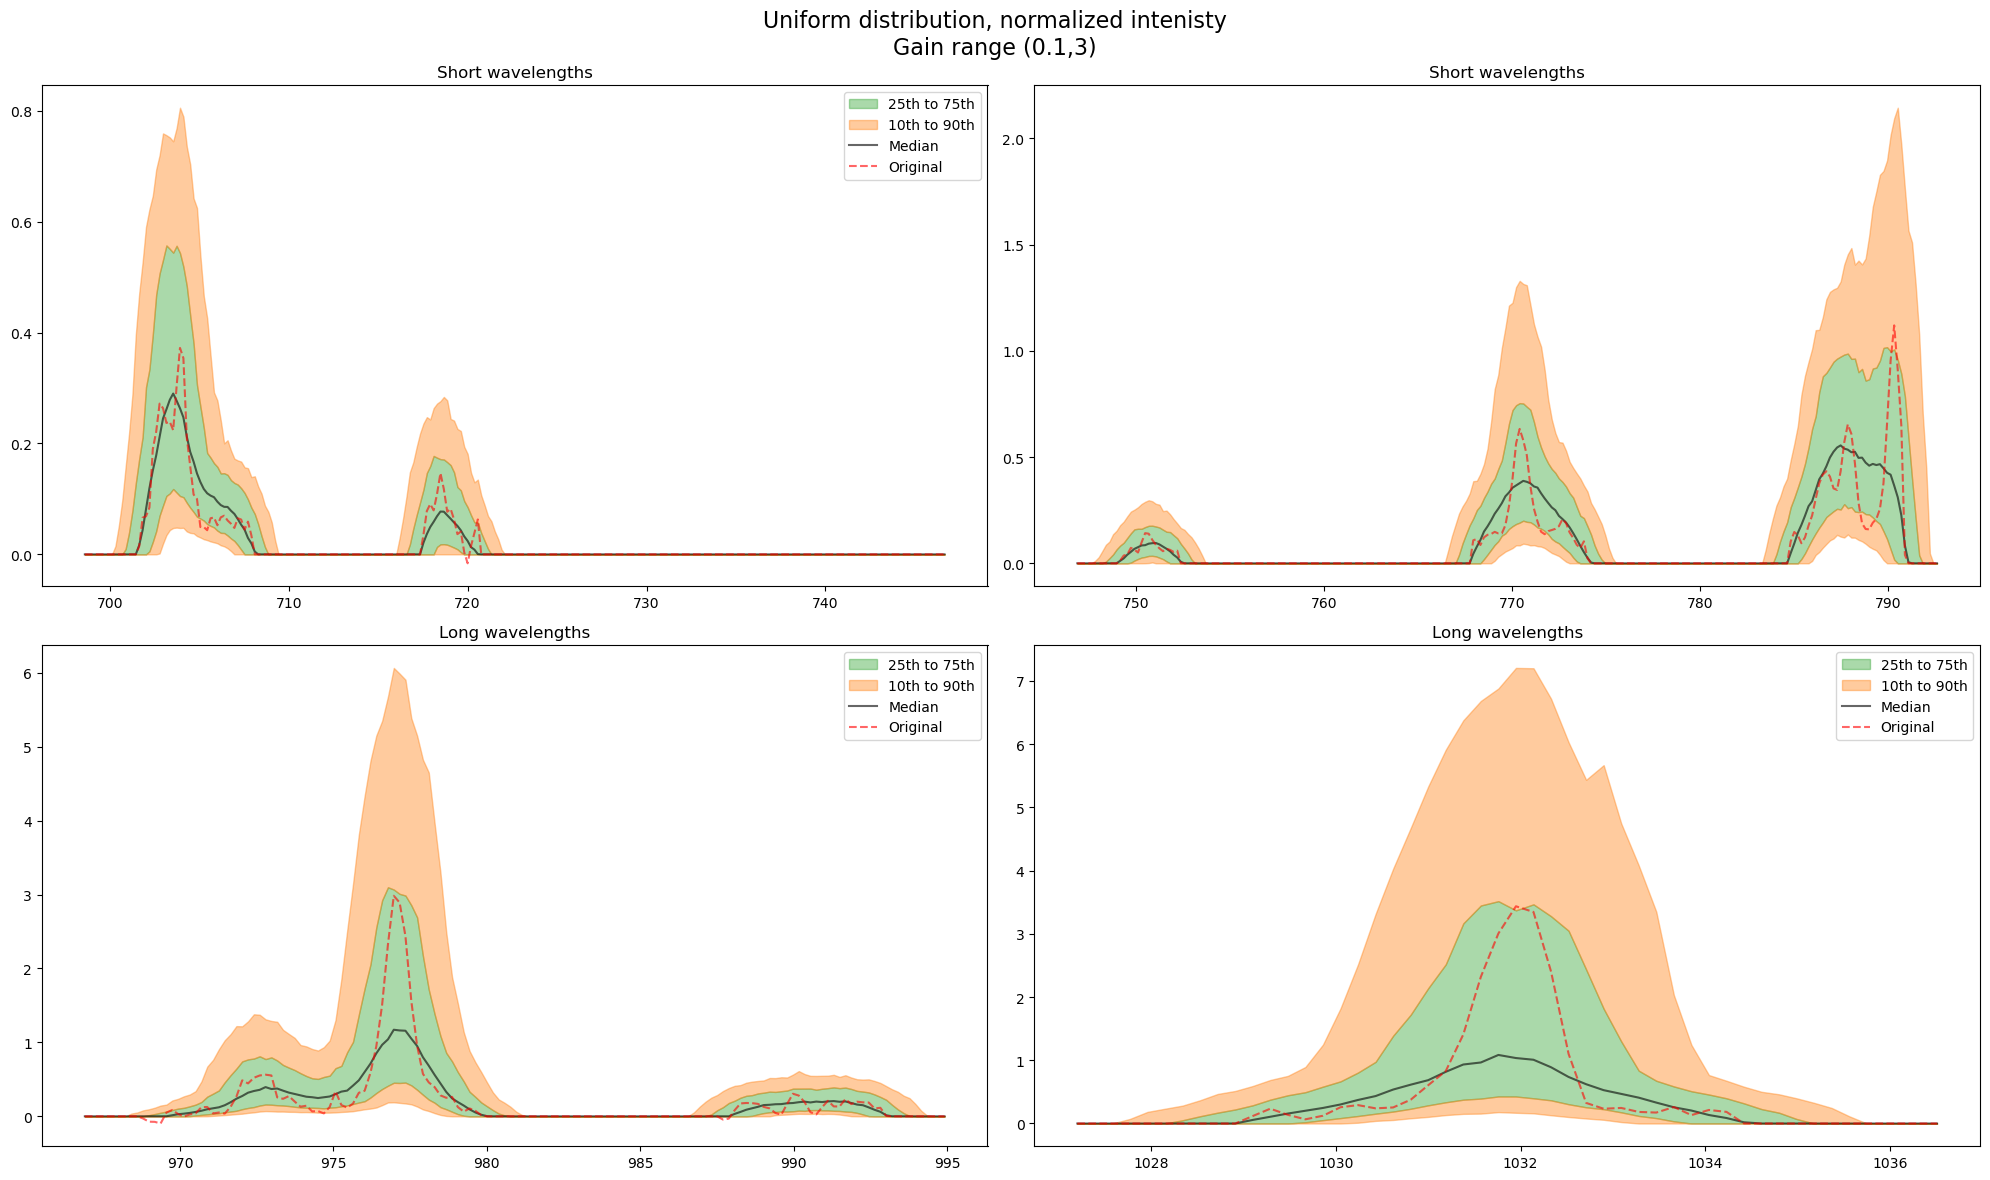

In [ ]:
plt.figure(figsize=(20, 12), tight_layout=True)
wvl = item['wvl'].values  
flux = item['flux'].values

# Extract statistics for the current item
medians = medians_1000aug
q10 = _10_perc_1000aug
q25 = _25_perc_1000aug
q75 = _75_perc_1000aug
q90 = _90_perc_1000aug

# First subplot (Short wavelengths)
plt.subplot(221)
plt.title('Short wavelengths')
plt.gca().fill_between(wvl[:110], q25[:110], q75[:110], color='tab:green', alpha=0.4, label='25th to 75th')
plt.gca().fill_between(wvl[:110], q10[:110], q25[:110], color='tab:orange', alpha=0.4, label='10th to 90th')
plt.gca().fill_between(wvl[:110], q75[:110], q90[:110], color='tab:orange', alpha=0.4)
plt.plot(wvl[:110], medians[:110], label='Median', color='black', alpha=0.6)
plt.plot(wvl[:110], flux[:110], label='Original', color="r", linestyle='--', alpha=0.6)
plt.legend()

# Second subplot (Short wavelengths)
plt.subplot(222)
plt.title('Short wavelengths')
plt.gca().fill_between(wvl[110:270], q25[110:270], q75[110:270], color='tab:green', alpha=0.4, label='25th to 75th')
plt.gca().fill_between(wvl[110:270], q10[110:270], q25[110:270], color='tab:orange', alpha=0.4, label='10th to 90th')
plt.gca().fill_between(wvl[110:270], q75[110:270], q90[110:270], color='tab:orange', alpha=0.4)
plt.plot(wvl[110:270], medians[110:270], label='Median', color='black', alpha=0.6)
plt.plot(wvl[110:270], flux[110:270], label='Original', color="r", linestyle='--', alpha=0.6)
# for item in items:
#     wvl = items[0]['wvl'].values [110:270] 
#     plt.plot(wvl, item['flux'].values[110:270], color='gray', alpha=0.2)
# plt.legend()

# Third subplot (Long wavelengths)
plt.subplot(223)
plt.title('Long wavelengths')
plt.gca().fill_between(wvl[276:400], q25[276:400], q75[276:400], color='tab:green', alpha=0.4, label='25th to 75th')
plt.gca().fill_between(wvl[276:400], q10[276:400], q25[276:400], color='tab:orange', alpha=0.4, label='10th to 90th')
plt.gca().fill_between(wvl[276:400], q75[276:400], q90[276:400], color='tab:orange', alpha=0.4)
plt.plot(wvl[276:400], medians[276:400], label='Median', color='black', alpha=0.6)
plt.plot(wvl[276:400], flux[276:400], label='Original', color="r", linestyle='--', alpha=0.6)
plt.legend()

# Fourth subplot (Long wavelengths)
plt.subplot(224)
plt.title('Long wavelengths')
plt.gca().fill_between(wvl[401:], q25[401:], q75[401:], color='tab:green', alpha=0.4, label='25th to 75th')
plt.gca().fill_between(wvl[401:], q10[401:], q25[401:], color='tab:orange', alpha=0.4, label='10th to 90th')
plt.gca().fill_between(wvl[401:], q75[401:], q90[401:], color='tab:orange', alpha=0.4)
plt.plot(wvl[401:], medians[401:], label='Median', color='black', alpha=0.6)
plt.plot(wvl[401:], flux[401:], label='Original', color="r", linestyle='--', alpha=0.6)
plt.legend()

#plt.suptitle('Gaussian distribution, unnormalized intenisty\nGain range (0.1,3)', fontsize=16)
plt.suptitle('Uniform distribution, normalized intenisty\nGain range (0.1,3)', fontsize=16)
plt.show()


-----------------------------------------------------------------


# 100 augmentations

In [64]:
items = [spectra.isel(index=x) for x in [random.randint(0, len(spectra['index'])) for i in range(100)]]

In [83]:
aug = Augmentation(type_distrib_gain='gaussian', num_hits=1, gain_range=(0.1, 3), normalize_intensity=False)

In [84]:
augs_dict = {}

for idx, item in enumerate(items):
    augs_dict[f"augs_{idx}"] = [aug.run_all_augmentations(item)[0] for _ in range(1000)]

In [85]:
medians_1000aug = {}
_10_perc_1000aug = {}
_25_perc_1000aug = {}
_75_perc_1000aug = {}
_90_perc_1000aug = {}

for key, augs in augs_dict.items():
    stacked_augs = np.stack(augs)  # Convert list to NumPy array (shape: 1000, 451)

    medians_1000aug[key] = np.median(stacked_augs, axis=0)
    _10_perc_1000aug[key] = np.quantile(stacked_augs, 0.1, axis=0)
    _25_perc_1000aug[key] = np.quantile(stacked_augs, 0.25, axis=0)
    _75_perc_1000aug[key] = np.quantile(stacked_augs, 0.75, axis=0)
    _90_perc_1000aug[key] = np.quantile(stacked_augs, 0.9, axis=0)


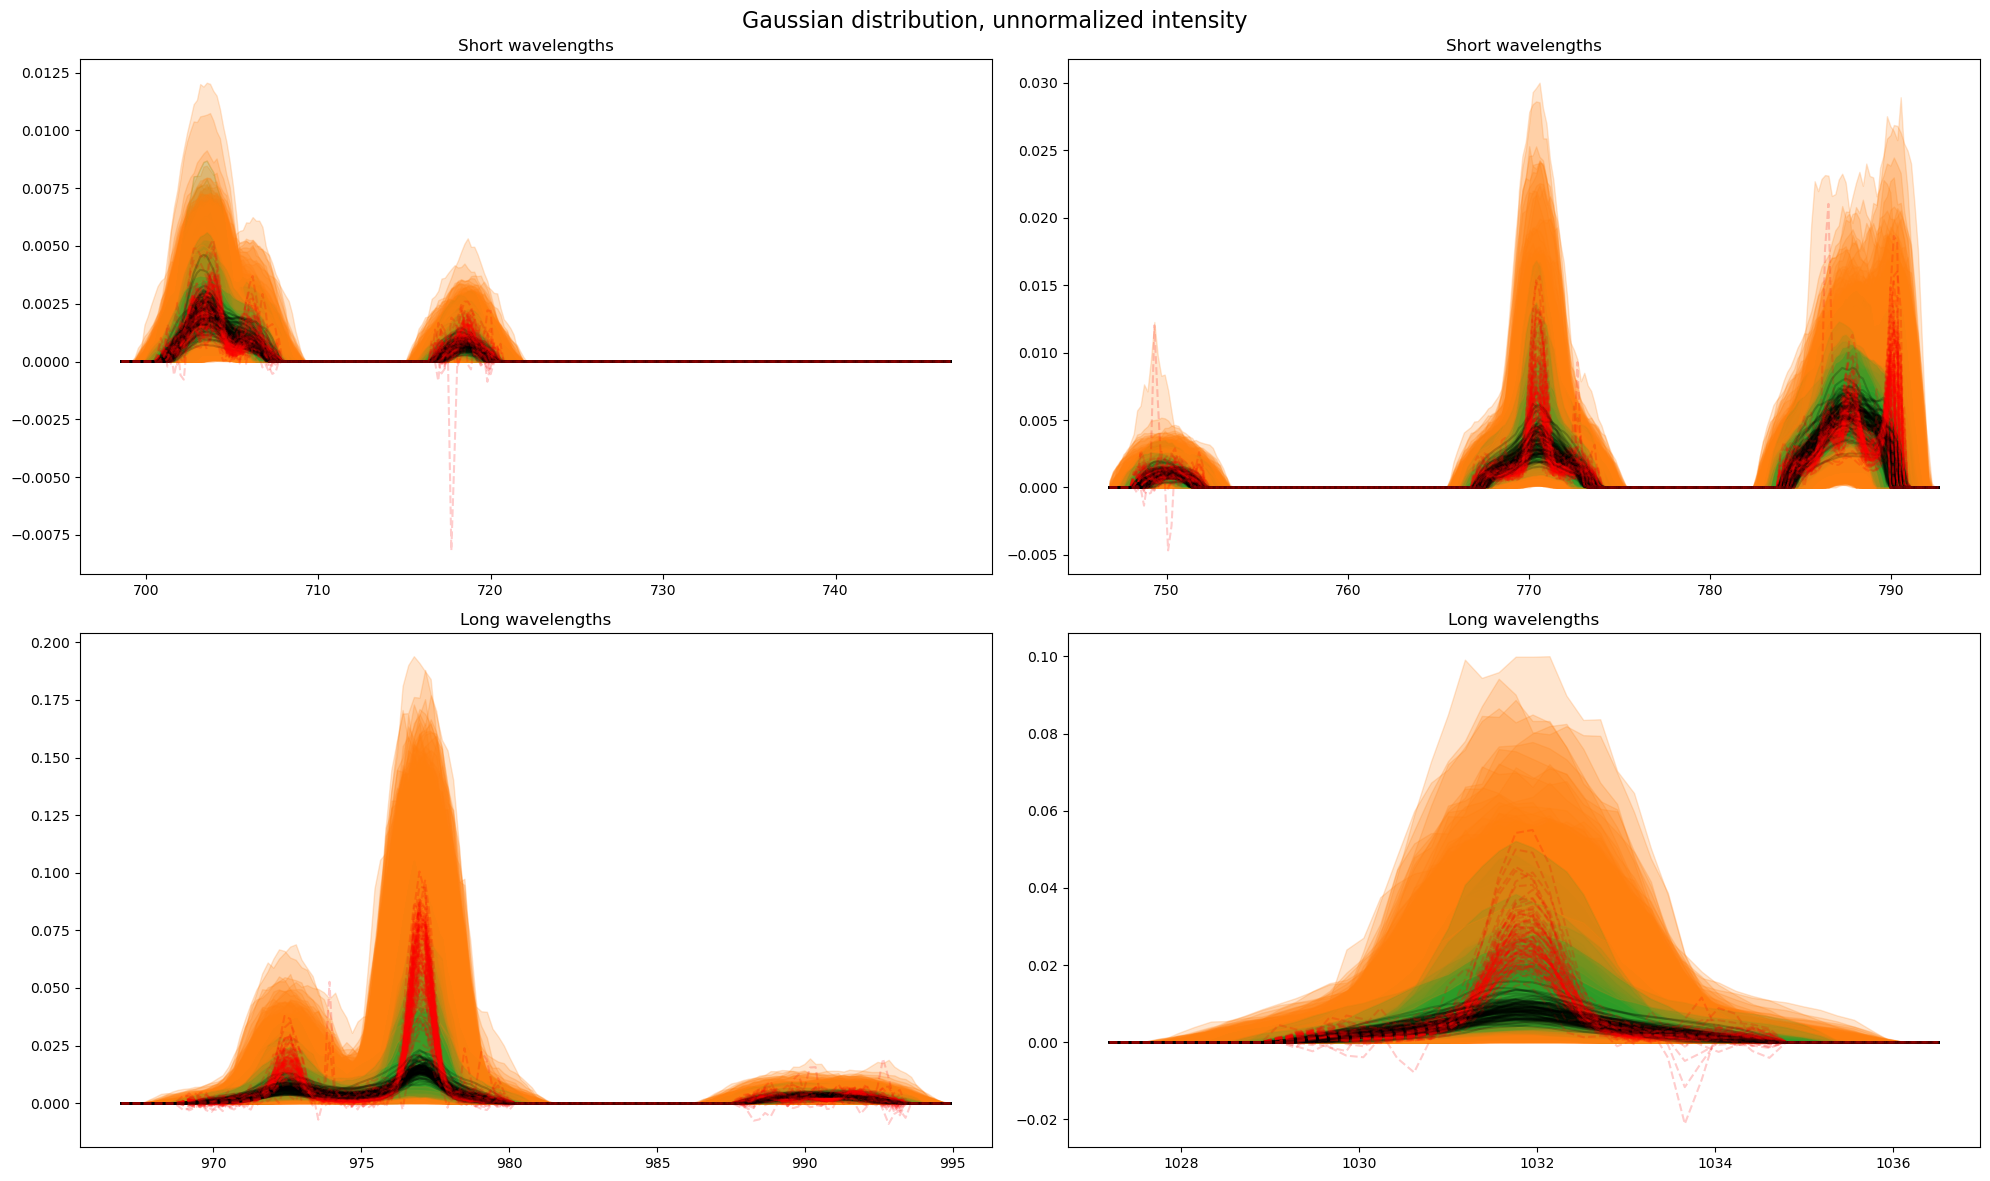

In [ ]:
plt.figure(figsize=(20, 12), tight_layout=True)
x=0
for key, item in augs_dict.items():
    #plt.figure(figsize=(10, 6), tight_layout=True)
    wvl = items[0]['wvl'].values  
    flux = items[x]['flux'].values

    # Extract statistics for the current item
    medians = medians_1000aug[key]
    q10 = _10_perc_1000aug[key]
    q25 = _25_perc_1000aug[key]
    q75 = _75_perc_1000aug[key]
    q90 = _90_perc_1000aug[key]

    # First subplot (Short wavelengths)
    plt.subplot(221)
    plt.title('Short wavelengths')
    plt.gca().fill_between(wvl[:110], q25[:110], q75[:110], color='tab:green', alpha=0.2, label='25th to 75th')
    plt.gca().fill_between(wvl[:110], q10[:110], q25[:110], color='tab:orange', alpha=0.2, label='10th to 90th')
    plt.gca().fill_between(wvl[:110], q75[:110], q90[:110], color='tab:orange', alpha=0.2)
    plt.plot(wvl[:110], medians[:110], label='Median', color='black', alpha=0.2)
    plt.plot(wvl[:110], flux[:110], label='Original', color="r", linestyle='--', alpha=0.2)
    # plt.legend()

    # Second subplot (Short wavelengths)
    plt.subplot(222)
    plt.title('Short wavelengths')
    plt.gca().fill_between(wvl[110:270], q25[110:270], q75[110:270], color='tab:green', alpha=0.2, label='25th to 75th')
    plt.gca().fill_between(wvl[110:270], q10[110:270], q25[110:270], color='tab:orange', alpha=0.2, label='10th to 90th')
    plt.gca().fill_between(wvl[110:270], q75[110:270], q90[110:270], color='tab:orange', alpha=0.2)
    plt.plot(wvl[110:270], medians[110:270], label='Median', color='black', alpha=0.2)
    plt.plot(wvl[110:270], flux[110:270], label='Original', color="r", linestyle='--', alpha=0.2)
    #  plt.legend()

    # Third subplot (Long wavelengths)
    plt.subplot(223)
    plt.title('Long wavelengths')
    plt.gca().fill_between(wvl[276:400], q25[276:400], q75[276:400], color='tab:green', alpha=0.2, label='25th to 75th')
    plt.gca().fill_between(wvl[276:400], q10[276:400], q25[276:400], color='tab:orange', alpha=0.2, label='10th to 90th')
    plt.gca().fill_between(wvl[276:400], q75[276:400], q90[276:400], color='tab:orange', alpha=0.2)
    plt.plot(wvl[276:400], medians[276:400], label='Median', color='black', alpha=0.2)
    plt.plot(wvl[276:400], flux[276:400], label='Original', color="r", linestyle='--', alpha=0.2)
    # plt.legend()

    # Fourth subplot (Long wavelengths)
    plt.subplot(224)
    plt.title('Long wavelengths')
    plt.gca().fill_between(wvl[401:], q25[401:], q75[401:], color='tab:green', alpha=0.2, label='25th to 75th')
    plt.gca().fill_between(wvl[401:], q10[401:], q25[401:], color='tab:orange', alpha=0.2, label='10th to 90th')
    plt.gca().fill_between(wvl[401:], q75[401:], q90[401:], color='tab:orange', alpha=0.2)
    plt.plot(wvl[401:], medians[401:], label='Median', color='black', alpha=0.2)
    plt.plot(wvl[401:], flux[401:], label='Original', color="r", linestyle='--', alpha=0.2)
    # plt.legend()
    x+=1

plt.suptitle(f'Gaussian distribution, unnormalized intensity', fontsize=16)
plt.show()

# plt.figure(figsize=(20, 12), tight_layout=True)

# for item in items:
#     wvl = items[0]['wvl'].values  
#     plt.plot(wvl, item['flux'].values)
# plt.ylim(0,50)


In [ ]:
plt.figure(figsize=(15,4))
for x in range(1000):
    plt.plot(wvl, augs_dict['augs_50'][x])
plt.plot(wvl, items[50]['flux'].values, color='black', linestyle='--')


# Test dataset

In [ ]:
import Siamese_Architecture as SA
from pytorch_lightning.loggers import WandbLogger
import pytorch_lightning as pl

In [ ]:
dataset_path = "C:\\Users\\tania\\Documents\\SPICE\\SPROUTS\\spectra_11Feb2023.nc"
BATCH_SIZE=32
dataset = SproutDataset(dataset_path=dataset_path, augmentation_type='double', log10space=True)
dataloader = DataLoader(
            dataset,
            batch_size=BATCH_SIZE,
            shuffle=True)

In [ ]:
model = SA.SimSiam(output_dim=64, backbone_output_dim=128, hidden_layer_dim=128)

wandb_logger = WandbLogger(project="feb11Dataset_64_doubleAug_log", log_model=True)
accelerator = "gpu" if torch.cuda.is_available() else "cpu"
trainer = pl.Trainer(max_epochs=1, devices=1, accelerator=accelerator, logger=wandb_logger)

In [ ]:
trainer.fit(model=model, train_dataloaders=dataloader)

In [ ]:
import tqdm
model.eval()
outputs = []
with torch.no_grad():  # Disable gradient computation for inference
    for i in tqdm.tqdm(range (dataset.__len__())):
        spec = dataset.__getitem__(i).unsqueeze(0)
        # Move tensor to the same device as the model
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = model.to(device)
        spec = spec.to(device)

        outputs.append(model(spec)[0].cpu().numpy())